<a href="https://colab.research.google.com/github/ninivehelen/Projetos_Web_Scraping/blob/master/web_scraping_rottentomatoes_batman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [132]:
from bs4 import BeautifulSoup
from selenium import webdriver
from time  import sleep
import csv
import json

quantidade_paginas = 19
criticas = []

chrome_options = webdriver.ChromeOptions()

chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--start-maximized')

site = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

site.get('https://www.rottentomatoes.com/m/the_batman/reviews?intcmp=rt-scorecard_tomatometer-reviews')
for i in range(quantidade_paginas):
    botao = site.find_element_by_xpath('//*[@id="content"]/div/div/div/nav[1]/button[2]/span').click()
    sleep(1)
    pagina = site.page_source
    pagina1 = BeautifulSoup(pagina, 'html.parser')
    criticas = criticas + [critica.text for critica in pagina1.find_all('div', attrs={'class':'the_review'})]
    
      
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead


In [133]:
len(criticas)

380

In [134]:
with open('Critica_Batman.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(criticas)

In [135]:
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [136]:
with open('Critica_Batman.csv', 'r') as f:
  reader = csv.reader(f)
  critica = list(reader)[0]

In [137]:
len(critica)

380

In [138]:
stop_words = set(stopwords.words('english')) 
word_tokens=[]
for review in critica:   
    word_tokens = word_tokens + word_tokenize(review) 
  
filtered_word_reviews = [w for w in word_tokens if not w in stop_words] 

In [139]:
len(filtered_word_reviews)

7675

In [140]:
def drawWordCloud(words, filename):
    text = ''
    for w in words:
        text = text + ' ' + w

    mask = np.array(Image.open("/content/m_batman.jpg"))
    image_colors = ImageColorGenerator(mask)

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud( background_color="white", max_words=1000, mask=mask).generate(text)
    
    fig, axes = plt.subplots(1,2 , figsize=(16,20))
    axes[0].imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    axes[1].imshow(wordcloud.recolor(color_func=image_colors,random_state=3),
           interpolation="bilinear")
    for ax in axes:
        ax.set_axis_off()
    plt.savefig(filename+".png", format="png", dpi=200)
    plt.show()
    

In [141]:
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')]
print (adjs[:500])

['vulnerable', 'shot', 'slow', 'good', 'goth', 'furry', 'animal', 'fursona', 'furry', 'furry', 'fun', 'weight', 'long-running', 'unwanted', 'plenty', 'best', 'near', 'operatic', 'afraid', 'generic', 'noir', 'promising', 'new', 'strong', 'impeccable', 'impressive', 'oh-so-serious', 'fresh', 'complex', 'titular', 'emboldened', 'memorable', 'visual', 'first', 'clichés', 'tense', 'noir-as-night', 'best', 'good', 'surprising', 'hellish', 'best', 'comic', 'smartest', 'comic', 'strongest', 'first', 'double', 'frequent', 'desperate', 'beautiful', 'arrive', 'else', 'impressive', 'lean', 'darkness', 'undeniably', 'serious', 'safe', 'underlying', 'one-note', 'crucial', 'climactic', '’', 'deeply-moving', 'interesting', 'darkest', 'cinematic', 'terrific', 'individual', 'elusive', 'sweet', 'popcorn', 'flick', 'complex', 'political', 'smart', 'ride', 'many', 'well-made', 'technical', 'critical', 'final', 'sight', 'procedural', 'distracted', 'numerous', 'solid', 'plot', 'bound', 'happy', 'left', 'dark

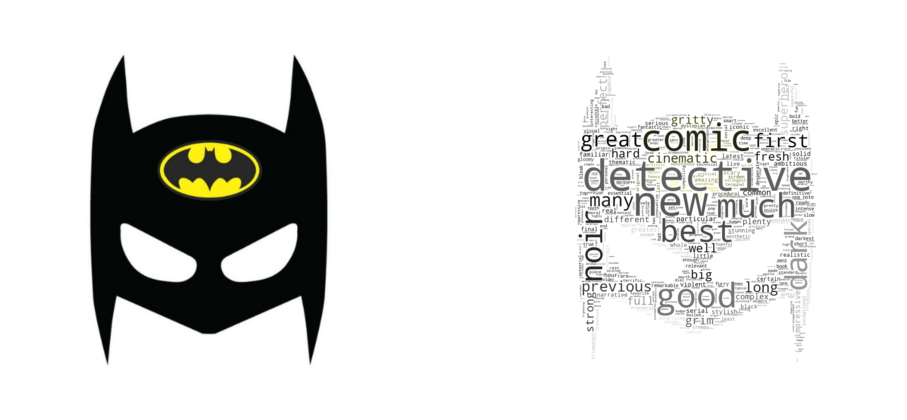

In [142]:
drawWordCloud(adjs, "batman-adjs")